# Lectura metadata

In [13]:
# Importo librerias

import pandas as pd
import numpy as np
import missingno as msxo
import matplotlib.pyplot as plt
import glob
import folium
import plotly.express as px
import re

Lectura de los archivos de metadata de los negocios de google. Esta metadata nos es util para poder cruzarla con las reviews y poder tener toda la informacion como conjunta

In [2]:
df_1 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\1.json', lines= True)
df_1.head()


,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...


In [3]:
df_2 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\2.json', lines= True)
df_3 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\3.json', lines= True)
df_4 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\4.json', lines= True)
df_5 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\5.json', lines= True)
df_6 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\6.json', lines= True)
df_7 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\7.json', lines= True)
df_8 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\8.json', lines= True)
df_9 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\9.json', lines= True)
df_10 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\10.json', lines= True)
df_11 = pd.read_json(r'C:\Users\flori\Desktop\LOCAL\GOOGLE\Google Maps\metadata-sitios\11.json', lines= True)


In [4]:
dfs = []


for i in range(1, 12):
    
    df = globals()[f'df_{i}']
    dfs.append(df)


merged_df = pd.concat(dfs, ignore_index=True)

In [6]:
# Checkeo de nulos y su porcentaje

nulls_FL = pd.DataFrame(merged_df.isnull().sum().sort_values(ascending = False))
nulls_FL["Porcentaje de nulos"] = round(nulls_FL/merged_df.shape[0]*100,2)
nulls_FL.rename(columns = {0:"Nro nulos"})

,Nro nulos,Porcentaje de nulos
description,2770722,91.59
price,2749808,90.90
hours,787405,26.03
state,746455,24.68
MISC,690834,22.84
relative_results,295058,9.75
address,80511,2.66
category,17419,0.58
name,37,0.00
gmap_id,0,0.00


In [7]:
#elimino las columnas que tienen mas de 85% de nulos
columnas= ['description','price']
merged_df= merged_df.drop(columns=columnas)

In [8]:
merged_df.shape 

(3025011, 13)

La union de todos los archivos de la carpeta metadata la pongo en un csv y lo copio en o tra carpeta para no acargarlo al github

In [9]:

# merged_df.to_csv('Metadata.csv', index=False, escapechar='\\')


In [2]:
metadata= pd.read_csv(r'C:\Users\flori\Desktop\LOCAL\Metadata.csv')
metadata.head()

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,32.388300,-83.357100,['Pharmacy'],4.9,16,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,34.018891,-118.215290,['Textile exporter'],4.5,6,NaN,NaN,Open now,"['0x80c2c624136ea88b:0xb0315367ed448771', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,34.058092,-118.292130,['Korean restaurant'],4.4,18,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,34.023669,-118.232930,['Fabric store'],3.3,6,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"['0x80c2c8811477253f:0x23a8a492df1918f7', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,34.036694,-118.249421,['Fabric store'],4.3,7,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"['0x80c2c62c496083d1:0xdefa11317fe870a1', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


In [3]:
metadata.shape

(3025011, 13)

In [4]:
metadata.columns

Index(['name', 'address', 'gmap_id', 'latitude', 'longitude', 'category',
       'avg_rating', 'num_of_reviews', 'hours', 'MISC', 'state',
       'relative_results', 'url'],
      dtype='object')

In [5]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3025011 entries, 0 to 3025010
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   name              object 
 1   address           object 
 2   gmap_id           object 
 3   latitude          float64
 4   longitude         float64
 5   category          object 
 6   avg_rating        float64
 7   num_of_reviews    int64  
 8   hours             object 
 9   MISC              object 
 10  state             object 
 11  relative_results  object 
 12  url               object 
dtypes: float64(3), int64(1), object(9)
memory usage: 300.0+ MB


In [6]:
metadata.category.isna().sum()

17419

In [8]:
metadata['category'].fillna("", inplace=True)

In [23]:
metadata['category'].unique()

array(["['Pharmacy']", "['Textile exporter']", "['Korean restaurant']",
       ..., "['Travellers lodge', 'Tour agency']",
       "['Deli', 'Coffee shop', 'Takeout Restaurant', 'Sandwich shop']",
       "['Truck dealer', 'Car dealer', 'Car repair and maintenance', 'RV repair shop', 'Truck repair shop']"],
      dtype=object)

In [17]:
masreviewa= metadata[['num_of_reviews', 'name']]
orden=masreviewa.sort_values(ascending=False, by='num_of_reviews')
top20=orden.head(30)

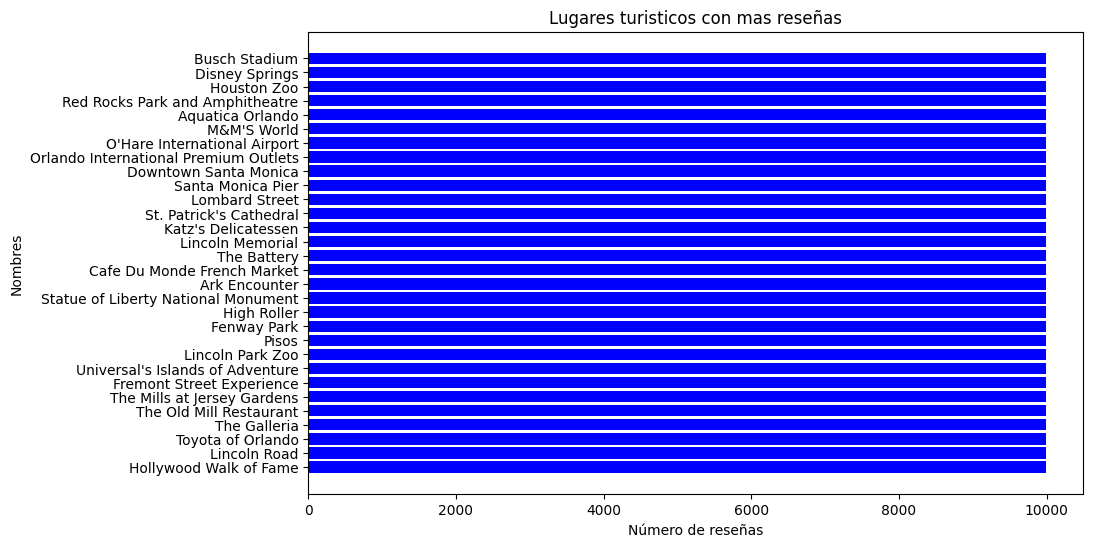

In [18]:
#Grafico los resultados de las 20 peliculas mas populares dentro del dataset
plt.figure(figsize=(10, 6))
plt.barh(top20['name'], top20['num_of_reviews'], color='blue')
plt.xlabel('Número de reseñas')
plt.ylabel('Nombres')
plt.title('Lugares turisticos con mas reseñas')
plt.show()

In [19]:
cate= metadata[['category','name']].groupby('category').count()
cate_sorted= cate.sort_values(ascending=False, by='name')
cate_sorted10=cate_sorted.head(10)

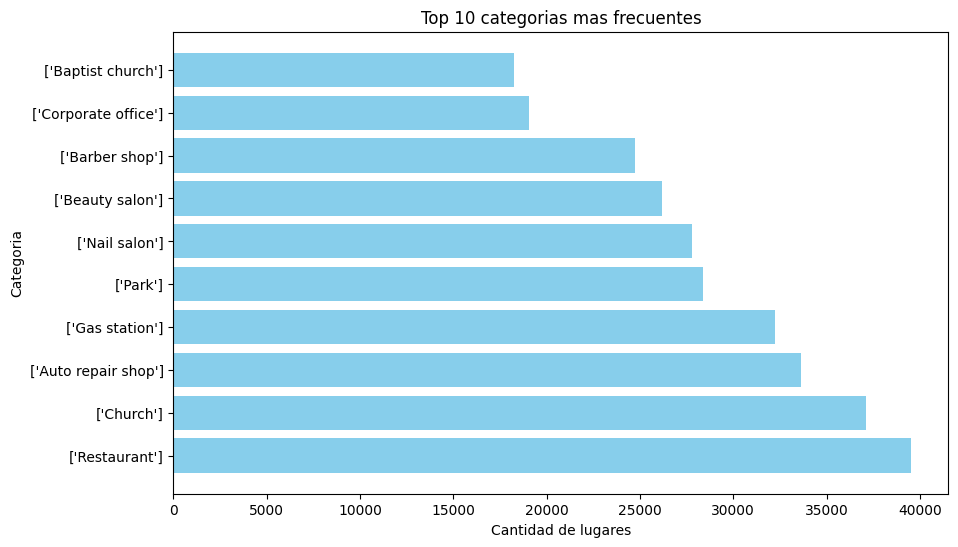

In [21]:
plt.figure(figsize=(10, 6))
plt.barh(cate_sorted10.index, cate_sorted10['name'], color='skyblue')
plt.xlabel('Cantidad de lugares')
plt.ylabel('Categoria')
plt.title('Top 10 categorias mas frecuentes')
plt.show()

(-1.099999268531531,
 1.0999998975855343,
 -1.099999717826094,
 1.0999999725032714)

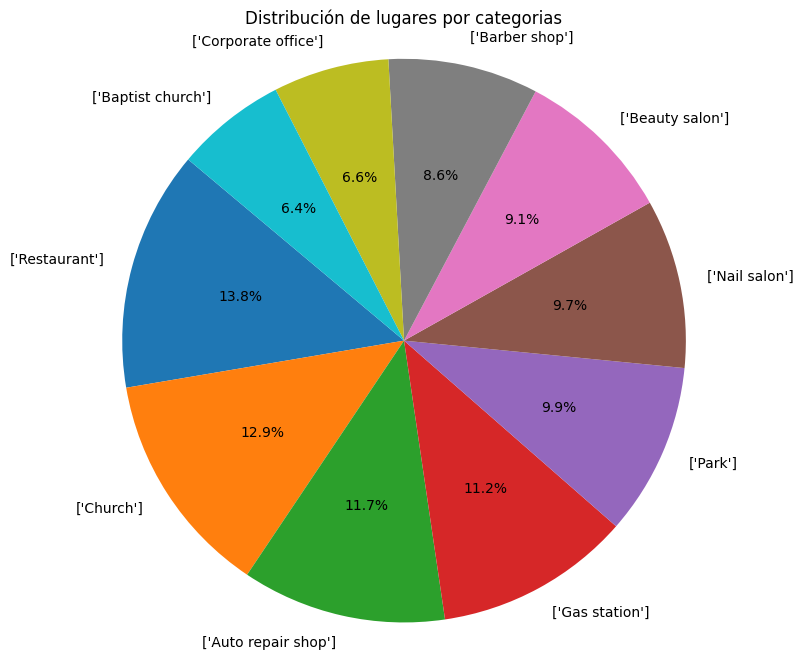

In [25]:
plt.figure(figsize=(8, 8))
plt.pie(cate_sorted10['name'], labels=cate_sorted10.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de lugares por categorias')
plt.axis('equal') 

In [27]:
metadata['latitude'].min()

-40.9293076

In [28]:
metadata['latitude'].max()

87.8565179

In [29]:
metadata['longitude'].min()

-178.80707619999998

In [30]:
metadata['longitude'].max()

180.0

In [34]:
unique_addresses= metadata['address'].unique()

array(['Porter Pharmacy, 129 N Second St, Cochran, GA 31014',
       'City Textile, 3001 E Pico Blvd, Los Angeles, CA 90023',
       'San Soo Dang, 761 S Vermont Ave, Los Angeles, CA 90005', ...,
       'Central Ny Spay Neuter Assista, 17 Salisbury St, Cortland, NY 13045',
       'Ok Feed Store, 16300 SW 296th St, Homestead, FL 33033',
       'Crestview Crossing, Newberg, OR 97132'], dtype=object)

In [36]:
unique_addresses = metadata.drop_duplicates(subset='address', keep='first')

In [39]:
# Crear mapa centrado en Florida
m1 = folium.Map(location=[87.8565179, -178.80707619999998] ,zoom_start=6)


# Agrego cada punto del dataframe al mapa
for _, row in unique_addresses.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        fill=True,
        fill_color="blue",
        fill_opacity=0.6
    ).add_to(m1)

#tardo 5 minutos 24 segundos
m1.save("mapa1.html")

MemoryError: 

In [ ]:
# Definicion de funcion para poder filtrar la categoria "restaurant"
def contains_restaurant(category):
    return re.search(r'restaurant', category, re.IGNORECASE) is not None

# Mascara para poder aplicarle el filtro que queremos
mask = metadata['category'].apply(contains_restaurant)


filtered_df = metadata[mask]


In [ ]:
filtered_df.shape

(1019821, 22)

In [ ]:
# filtramos por florida

import geopandas as gpd
from shapely.geometry import Point

# Cargar el shapefile o GeoJSON de Florida
usa = gpd.read_file("C:/Users/tomas/Desktop/DS - HENRY/00.LABS/3.PF\Proyecto_Final/st12_d00.shp")
florida = usa[usa['NAME'] == 'Florida']

# Convierte tu DataFrame a un GeoDataFrame
geometry = [Point(xy) for xy in zip(filtered_df['longitude'], filtered_df['latitude'])]
geo_df = gpd.GeoDataFrame(filtered_df, geometry=geometry)

# Filtra solo aquellos puntos que están dentro de Florida
florida_points = geo_df[geo_df.geometry.within(florida.geometry.iloc[0])]

florida_points

,user_id,name_x,time,rating,text,pics,resp,gmap_id,name_y,address,...,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,geometry
2056,1.130683e+20,Edwin Ashurst,1537195868022,5,The salads were lackluster though with well wr...,NaN,NaN,0x8894b5a7a7909725:0xe4687299fd288188,Gormley's on the river | Modern cuisine in his...,Gormley's on the river | Modern cuisine in his...,...,"['Modern French restaurant', 'Restaurant']",4.3,17,NaN,"[['Thursday', '5–9PM'], ['Friday', '5–10PM'], ...",{'Service options': ['Delivery']},Permanently closed,"['0x8894b5a649e1f5cb:0xe5ef826dc2f3842f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,POINT (-84.98153 29.72695)
2057,1.130683e+20,Edwin Ashurst,1537195868022,5,The salads were lackluster though with well wr...,NaN,NaN,0x8894b5a7a7909725:0xe4687299fd288188,Gormley's on the river | Modern cuisine in his...,Gormley's on the river | Modern cuisine in his...,...,"['Modern French restaurant', 'Restaurant']",4.3,17,NaN,"[['Thursday', '5–9PM'], ['Friday', '5–10PM'], ...",{'Service options': ['Delivery']},Permanently closed,"['0x8894b5a649e1f5cb:0xe5ef826dc2f3842f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,POINT (-84.98153 29.72695)
2058,1.059416e+20,Douglas Gummere,1537402367631,1,"Love this place. Great little restaurant, with...",NaN,NaN,0x8894b5a7a7909725:0xe4687299fd288188,Gormley's on the river | Modern cuisine in his...,Gormley's on the river | Modern cuisine in his...,...,"['Modern French restaurant', 'Restaurant']",4.3,17,NaN,"[['Thursday', '5–9PM'], ['Friday', '5–10PM'], ...",{'Service options': ['Delivery']},Permanently closed,"['0x8894b5a649e1f5cb:0xe5ef826dc2f3842f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,POINT (-84.98153 29.72695)
2059,1.059416e+20,Douglas Gummere,1537402367631,1,"Love this place. Great little restaurant, with...",NaN,NaN,0x8894b5a7a7909725:0xe4687299fd288188,Gormley's on the river | Modern cuisine in his...,Gormley's on the river | Modern cuisine in his...,...,"['Modern French restaurant', 'Restaurant']",4.3,17,NaN,"[['Thursday', '5–9PM'], ['Friday', '5–10PM'], ...",{'Service options': ['Delivery']},Permanently closed,"['0x8894b5a649e1f5cb:0xe5ef826dc2f3842f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,POINT (-84.98153 29.72695)
2060,1.098577e+20,David Powell,1534936396392,5,A classy restaurant to match the charm of the ...,NaN,NaN,0x8894b5a7a7909725:0xe4687299fd288188,Gormley's on the river | Modern cuisine in his...,Gormley's on the river | Modern cuisine in his...,...,"['Modern French restaurant', 'Restaurant']",4.3,17,NaN,"[['Thursday', '5–9PM'], ['Friday', '5–10PM'], ...",{'Service options': ['Delivery']},Permanently closed,"['0x8894b5a649e1f5cb:0xe5ef826dc2f3842f', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,POINT (-84.98153 29.72695)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2866705,1.005875e+20,Christy Flanagan,1558307566729,4,NaN,NaN,"{'time': 1558395889016, 'text': 'Thank you, we...",0x88e77b72f6649745:0x79b4f1ce48d76510,Boston Market,"Boston Market, 250 E Michigan St, Orlando, FL ...",...,"['American restaurant', 'Caterer', 'Chicken re...",4.0,648,₩,"[['Tuesday', '11AM–10PM'], ['Wednesday', '11AM...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 10PM,"['0x88e77b72f9cc66f3:0x9a50571f55bc84d2', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,POINT (-81.37471 28.51255)
2866706,1.102315e+20,Mspoetry,1566753936154,3,NaN,NaN,"{'time': 1566865864044, 'text': 'We will striv...",0x88e77b72f6649745:0x79b4f1ce48d76510,Boston Market,"Boston Market, 250 E Michigan St, Orlando, FL ...",...,"['American restaurant', 'Caterer', 'Chicken re...",4.0,648,₩,"[['Tuesday', '11AM–10PM'], ['Wednesday', '11AM...","{'Service options': ['Curbside pickup', 'No-co...",Open ⋅ Closes 10PM,"['0x88e77b72f9cc66f3:0x9a50571f55bc84d2', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,POINT (-81.37471 28.

In [ ]:
florida_points.shape

(998734, 23)

In [ ]:
florida_points.address.nunique()

5136

In [ ]:
florida_points = florida_points[florida_points["text"].notna()]

In [ ]:
florida_points.address.nunique()

5136

In [ ]:
florida_points.to_parquet("florida_points.parquet")

# Exporto este dataset para poder tener la data de interes en un solo conjunto

MemoryError: Unable to allocate 70.5 MiB for an array with shape (15, 616160) and data type object

In [ ]:
pivot_table = florida_points.pivot_table(index=['name_y', 'latitude', 'longitude'], values='gmap_id', aggfunc='count').reset_index()

pivot_table = pivot_table.rename(columns={'gmap_id': 'review_count'})

pivot_table

: 

In [ ]:
florida_points_with_text = florida_points[florida_points["text"].notna()]

In [ ]:
florida_points_with_text.name_y.value_counts()

McDonald's                          36700
Wendy's                             11111
Chick-fil-A                          9265
Cracker Barrel Old Country Store     8412
IHOP                                 8138
                                    ...  
Villa Fresh Italian Kitchen             3
Mi Tierra Restaurant                    3
Broadway Cafe                           3
Antojos Boricuas II                     3
La Lunita Coffee Shop                   2
Name: name_y, Length: 4022, dtype: int64